# PRACTICA 6 - DISEÑO DE FILTROS DIGITALES
#### David Alejandro Henao , Maria Camila Bravo E 

In [131]:
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, iirfilter

### 1. Creación de señal 

Se definieron los parametros predichos , y una señal sinoidal dentro del rango de 0 a 1000 considerando un proceso electrofisiológico registrado sobre la superficie de la piel, considerando la atenuación y el retraso temporal que experimenta al atravesar diversos tejidos.

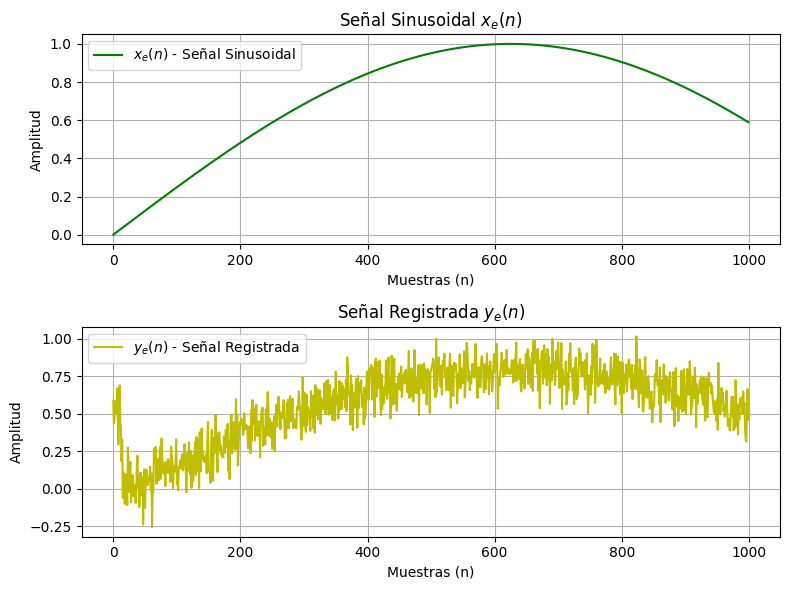

In [132]:
#PARAMETROS DEFINIDOS
F_0 = 0.01  #Frecuencia Inicial en HZ 
F_s = 25   #Frecuencia en HZ 
N = 1000 #Duracion de la senal 
D = 15     #Numero de muestras 
alpha = 0.8 # Amplitud
sigma_squared = 0.01  #Varianza del ruido 

# Generación del tiempo
n = np.arange(N)
t = n / F_s

# Generación de la señal sinusoidal x_e(n)
x_e = np.sin(2 * np.pi * F_0 * t)

# Generación del ruido gaussiano w(n)
w = np.random.normal(0, np.sqrt(sigma_squared), N)

# Generación de la señal registrada y_e(n)
y_e = alpha * np.roll(x_e, D) + w  # Se aplica el retraso y se añade el ruido

# Gráfica de las señales
plt.figure(figsize=(8, 6))

# Gráfico de la señal original x_e(n)
plt.subplot(2, 1, 1)
plt.plot(n, x_e, label='$x_e(n)$ - Señal Sinusoidal', color='green')
plt.title('Señal Sinusoidal $x_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Gráfico de la señal registrada y_e(n)
plt.subplot(2, 1, 2)
plt.plot(n, y_e, label='$y_e(n)$ - Señal Registrada', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()



### 2. Diseño de un Filtro 

####  1. FILTRO FIR

Considerando lo principales parametros de entrada  N: Orden del filtro y W_n: Frecuencia de corte. Se tiene que para filtros digitales W_n está normalizado entre 0 y 1, esto se obtiene dividiendo la frecuencia de muestreo sobre dos. Para Obtener los filtros se usa la función Firwin.

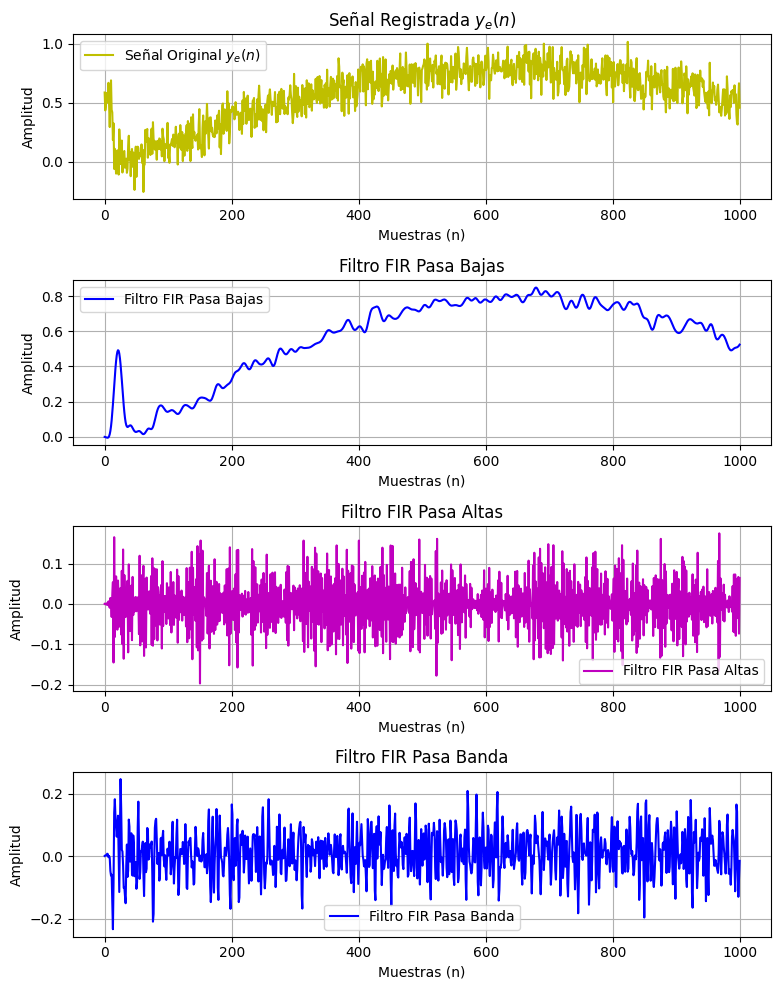

In [133]:
# Diseño de filtros FIR 

# Frecuencias de corte normalizadas
cutoff_low = 1.25 / (F_s / 2)  # Pasa bajas (1.25 muestras/s)
cutoff_high = 7.5 / (F_s / 2)   # Pasa altas (7.5 muestras/s)
order = 30                     # Orden del filtro


# Filtro pasa bajas
b_low = firwin(order + 1, cutoff_low)
y_e_fir_low = lfilter(b_low, 1.0, y_e)

# Filtro pasa altas
b_high = firwin(order + 1, cutoff_high, pass_zero=False)
y_e_fir_high = lfilter(b_high, 1.0, y_e)


# Filtro pasa banda (entre 1.25 y 7.5 muestras/s)
b_band = firwin(order + 1, [cutoff_low, cutoff_high], pass_zero=False)
y_e_fir_band = lfilter(b_band, 1.0, y_e)

# --- Gráficas de resultados ---
plt.figure(figsize=(8, 10))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='y')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_fir_low, label='Filtro FIR Pasa Bajas', color='blue')
plt.title('Filtro FIR Pasa Bajas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_fir_high, label='Filtro FIR Pasa Altas', color='m')
plt.title('Filtro FIR Pasa Altas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# FIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_fir_band, label='Filtro FIR Pasa Banda', color='b')
plt.title('Filtro FIR Pasa Banda')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar gráficas
plt.tight_layout()
plt.show()


#### ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? 
- Filtro pasa altas: Se añade el argumento pass_zero=False que indica que el filtro no pasará las componentes de frecuencia cero, convirtiéndose en un filtro pasa altas. Es necesario también especificar la frecuencia de corte, que debe estar normalizada (es decir, dividida por la frecuencia de Nyquist). Este filtro mide el grado maximo a las caracteristicas de la frecuencia [1][2]
- Filtro pasa banda: Al igual que en el filtro pasa altas, se utiliza pass_zero=False para asegurar que solo las frecuencias dentro del rango definido por los puntos de corte sean permitidas, mientras que las frecuencias por debajo de cutoff_low y por encima de cutoff_high son atenuadas.
- En esta misma linea de codigo tambien se puede implementar ventanas ya que pueden modificar la respuesta del filtro.

#### Observaciones:
- Se observa que existen cambios en los filtros pasa bandas y pasa Altas en comparacion a la señal original , mientras que el filtro de pasa bajas sigue la forma de la señal original con mucho menos ruido lo cual podria indicar que este es el filtro mas efectivo para esta señal permitiendo visualizarla mejor.

#### 2. FILTRO IIR

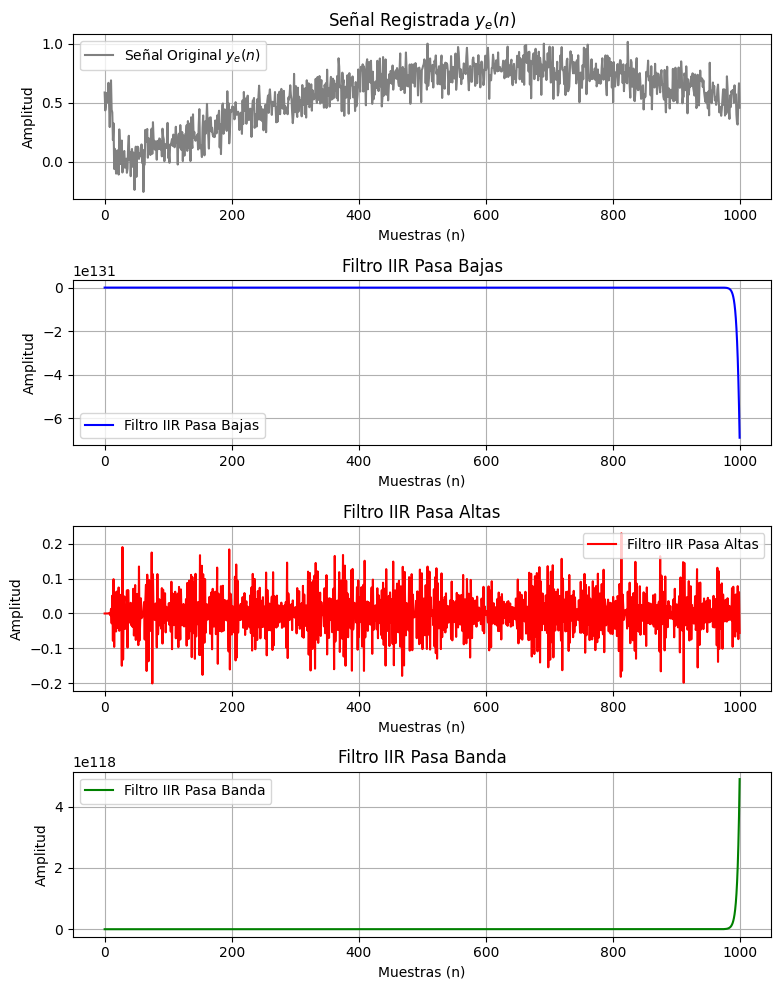

In [140]:
# Función para diseñar un filtro IIR Butterworth
def butter_filter(cutoff, fs, order=5, btype='low'):
    nyq = 0.5 * fs
    if isinstance(cutoff, list):
        normal_cutoff = [c / nyq for c in cutoff]
    else:
        normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    return b, a

# Diseñar filtros IIR
b_iir_low, a_iir_low = butter_filter(cutoff_low, F_s, order, btype='low')  # Pasa bajas
b_iir_high, a_iir_high = butter_filter(cutoff_high, F_s, order, btype='high')  # Pasa altas
b_iir_band, a_iir_band = butter_filter([cutoff_low, cutoff_high], F_s, order, btype='band')  # Pasa banda

# Aplicar el filtro a la señal (asumiendo que ya tienes y_e)
# Nota: Asegúrate de tener la señal 'y_e' definida antes de aplicar el filtro
y_e_iir_low = lfilter(b_iir_low, a_iir_low, y_e)
y_e_iir_high = lfilter(b_iir_high, a_iir_high, y_e)
y_e_iir_band = lfilter(b_iir_band, a_iir_band, y_e)


plt.figure(figsize=(8, 10))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa bajas
plt.subplot(4, 1, 2)
plt.plot(n, y_e_iir_low, label='Filtro IIR Pasa Bajas', color='blue')
plt.title('Filtro IIR Pasa Bajas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa altas
plt.subplot(4, 1, 3)
plt.plot(n, y_e_iir_high, label='Filtro IIR Pasa Altas', color='red')
plt.title('Filtro IIR Pasa Altas')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# IIR pasa banda
plt.subplot(4, 1, 4)
plt.plot(n, y_e_iir_band, label='Filtro IIR Pasa Banda', color='green')
plt.title('Filtro IIR Pasa Banda')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

# Mostrar gráficas
plt.tight_layout()
plt.show()

### 3. Filtrado 
 

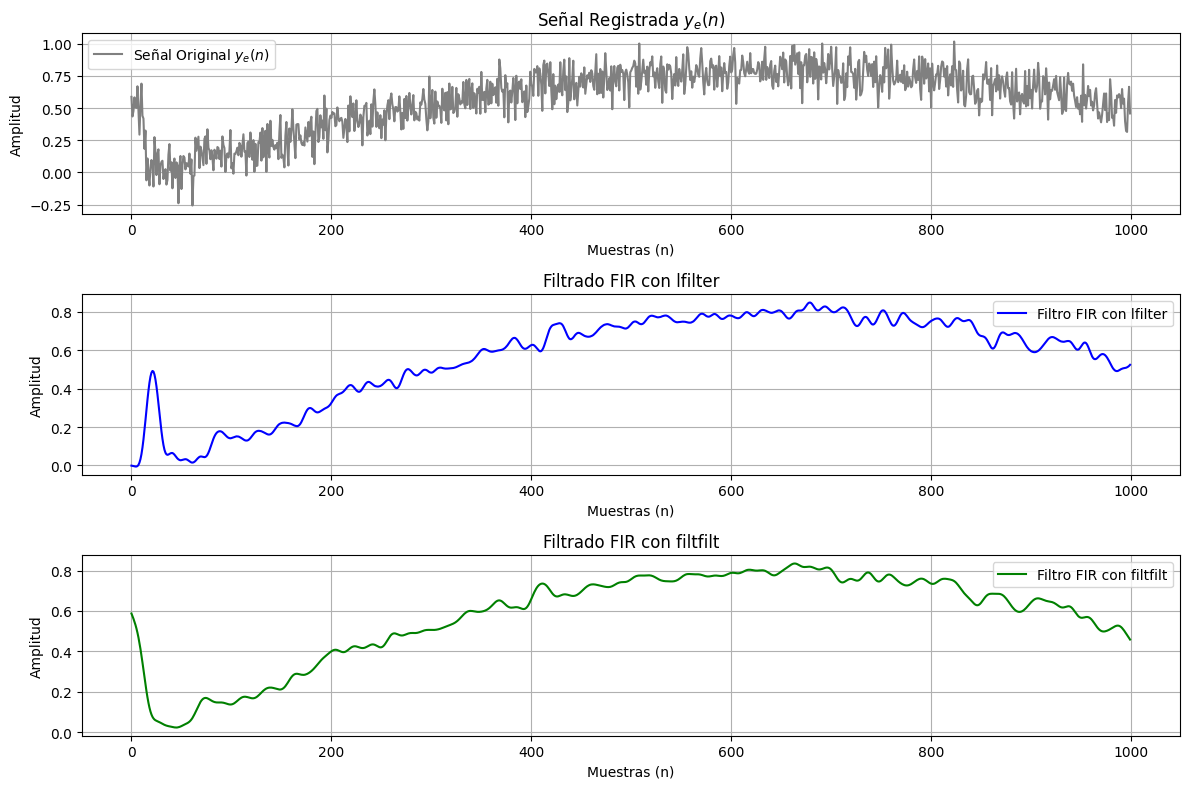

In [135]:
# Filtrado FIR usando lfilter
y_e_fir_low_lfilter = lfilter(b_low, 1.0, y_e)

# Filtrado FIR usando filtfilt
y_e_fir_low_filtfilt = signal.filtfilt(b_low, 1.0, y_e)

# Gráficas para FIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_fir_low_lfilter, label='Filtro FIR con lfilter', color='blue')
plt.title('Filtrado FIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_fir_low_filtfilt, label='Filtro FIR con filtfilt', color='green')
plt.title('Filtrado FIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.

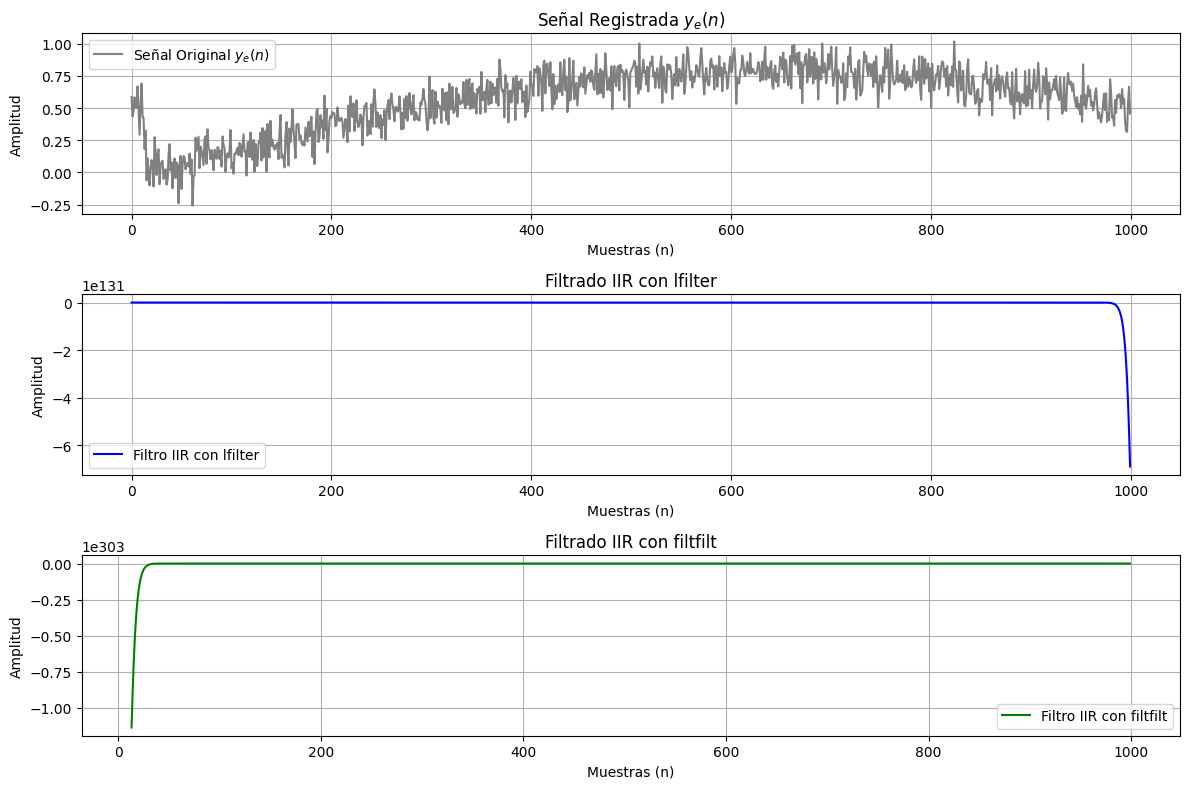

In [136]:
# Filtrado IIR usando lfilter
y_e_iir_low_lfilter = lfilter(b_iir_low, a_iir_low, y_e)

# Filtrado IIR usando filtfilt
y_e_iir_low_filtfilt = signal.filtfilt(b_iir_low, a_iir_low, y_e)

# Gráficas para el filtro IIR
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, y_e, label='Señal Original $y_e(n)$', color='gray')
plt.title('Señal Registrada $y_e(n)$')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_e_iir_low_lfilter, label='Filtro IIR con lfilter', color='blue')
plt.title('Filtrado IIR con lfilter')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_e_iir_low_filtfilt, label='Filtro IIR con filtfilt', color='green')
plt.title('Filtrado IIR con filtfilt')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()


¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. 

### 4. APLICACIÓN

Carga de la señal, canal 1 y definicion de la Fs

In [137]:
fs=500
#ruta = "c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Practica 6"
#datos = np.loadtxt("c:\\Users\\User\\OneDrive - Universidad de Antioquia\\David\\2024 - 2\\Bioseñales\\lab\\Práctica 6\\senal_filtros.txt") 
ruta = "/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6"
datos = np.loadtxt("/Users/mcamilabravo/Documents/Universidad 2024:2/Biosenales/Practica 6/senal_filtros.txt")

datos
canal1 = datos[:,0]
print("Forma de la señal cargada:", canal1.shape)
print("Tamaño de la señal cargada:", canal1.size)
canal1

Forma de la señal cargada: (60000,)
Tamaño de la señal cargada: 60000


array([-7.0306, -7.0157, -7.0426, ..., -7.5644, -7.5477, -7.5434])

Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice

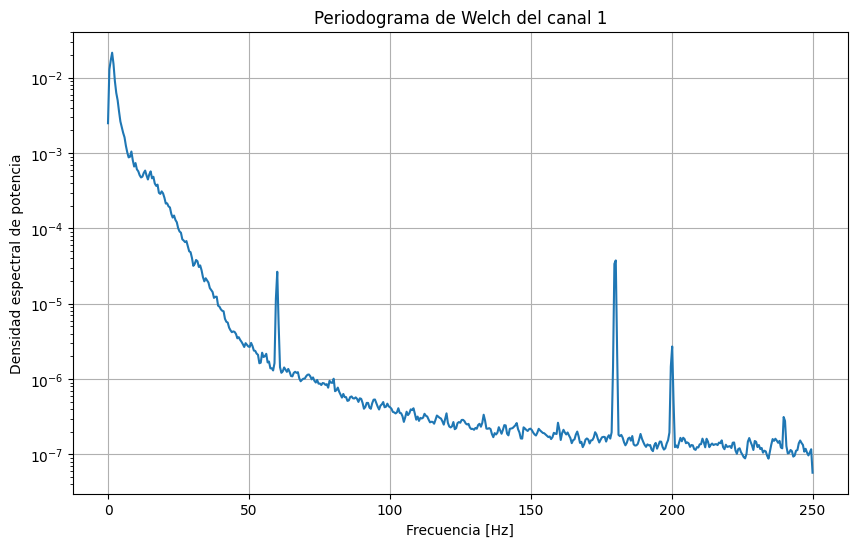

En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica


In [138]:
f, Pxx_den = signal.welch(canal1, fs, nperseg=1024)# Calcular el periodograma de Welch
plt.figure(figsize=(10, 6))# Graficar el periodograma
plt.semilogy(f, Pxx_den)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()

print('En el periodograma resultante, se observa el pico en 60 caracteristico del ruido producido por la red electrica')

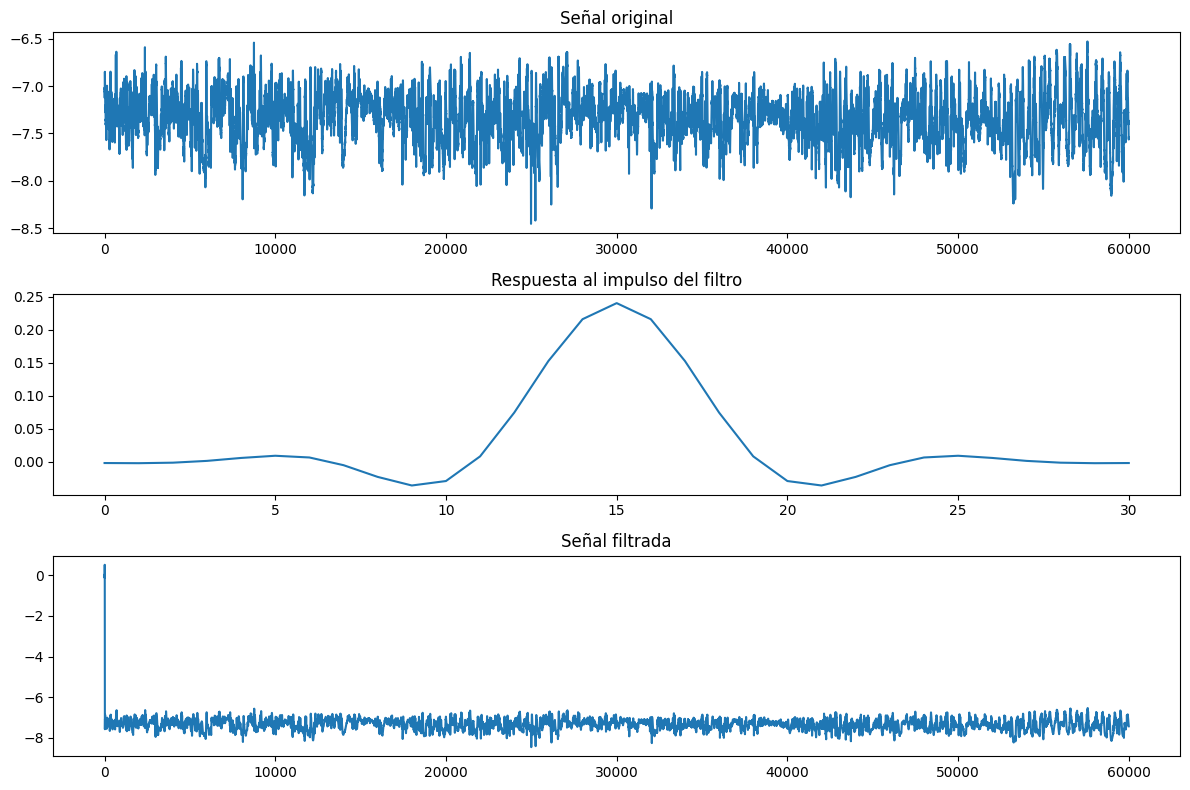

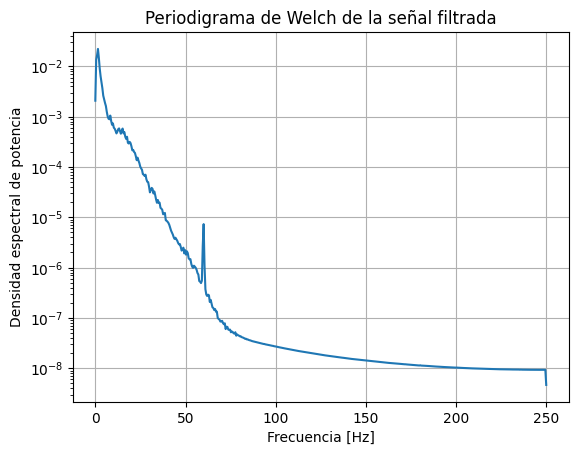

In [139]:
# Parámetros del filtro
frecuencia_corte = 60  # Frecuencia de corte para eliminar ruido
orden_filtro = 30  # Orden del filtro
ventana = 'hamming'  # Ventana

# Diseño del filtro FIR
coeficientes_filtro = signal.firwin(orden_filtro+1, frecuencia_corte / (fs / 2), window=ventana)

# Aplicación del filtro FIR a la señal
señal_filtrada = signal.lfilter(coeficientes_filtro, 1, canal1)

# Visualización
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(canal1)
plt.title('Señal original')

plt.subplot(3, 1, 2)
plt.plot(coeficientes_filtro)
plt.title('Respuesta al impulso del filtro')

plt.subplot(3, 1, 3)
plt.plot(señal_filtrada)
plt.title('Señal filtrada')

plt.tight_layout()
plt.show()

# Análisis en frecuencia
frecuencia, densidad_espectral_filtrada = signal.welch(señal_filtrada, fs, nperseg=1024, window='hamming')
plt.figure()
plt.semilogy(frecuencia, densidad_espectral_filtrada)
plt.title('Periodigrama de Welch de la señal filtrada')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.grid(True)
plt.show()


### Conclusiones  

- Los filtros digitales representan una herramienta ideal para el  procesamiento de señales, permitiéndonos manipular con precisión sus características frecuenciales, ademas no dependen de componente fisicos lo cual no tiene errores por tolerancia. 
- Se observo que los filtros pasa altas son utiles para eliminar ruido de baja frecuencia, mientras que los filtros pasa banda son eficaces para enfocarse en un rango específico de frecuencias. 
- Los filtros FIR son una excelente opción cuando se necesita que la señal mantenga su forma y coherencia en el tiempo. Ofrecen una respuesta en fase lineal, lo que significa que todas las frecuencias se procesan de manera uniforme. Mientras que los filtros IIR son más eficientes en términos de recursos. Utilizan un menor número de coeficientes para alcanzar resultados similares, lo que facilita su implementación, pero puede llevar a distorsiones en la fase. 

#### REFERENCIAS